<a href="https://colab.research.google.com/github/Nempickaxe/mini_projects/blob/master/Language_model_decoding_parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers
!pip install ecco

     |████████████████████████████████| 1.8MB 7.8MB/s 
     |████████████████████████████████| 890kB 31.9MB/s 
     |████████████████████████████████| 3.2MB 37.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=05b7e04eaaa5bc1e929a6ae6134383bef0b1cee6b375542e88fd6e9c3d972ab1
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
     |████████████████████████████████| 22.2MB 5.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import ecco

lm = ecco.from_pretrained('gpt2', activations=True)

In [ ]:
text = "The countries of the European Union"
output = lm.generate(text, generate=20, do_sample=True, top_k=30)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
output.layer_predictions(position=11, topk=30, layer=11)

Predictions for position 11


<IPython.core.display.Javascript object>

In [ ]:
lm.tokenizer(['Japan Norway Canada'])

{'input_ids': [[16504, 15238, 3340]], 'attention_mask': [[1, 1, 1]]}

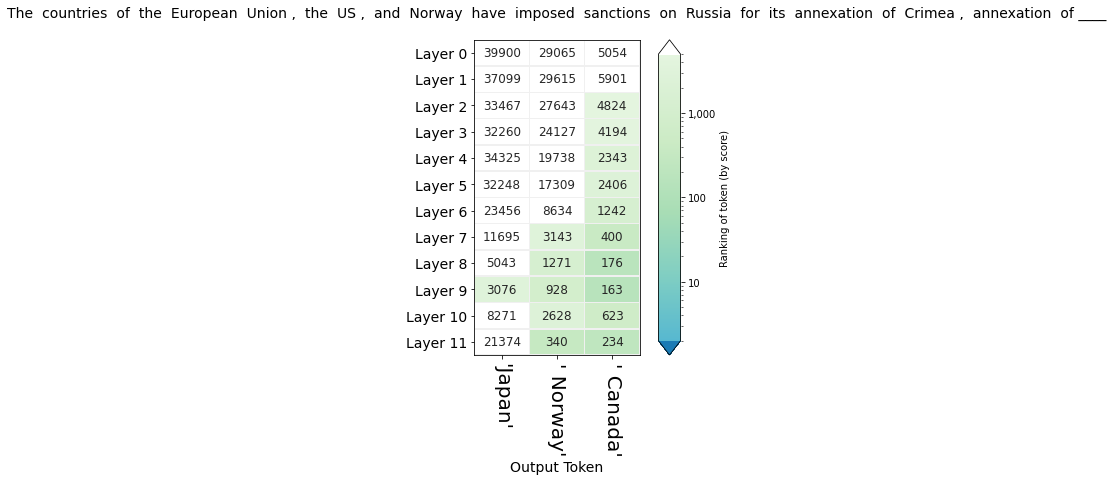

In [ ]:
output.rankings_watch([16504, 15238, 3340], position=8)

/usr/local/lib/python3.6/dist-packages/ecco/output.py:331: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  token_id = torch.tensor(self.token_ids[self.n_input_tokens + j])


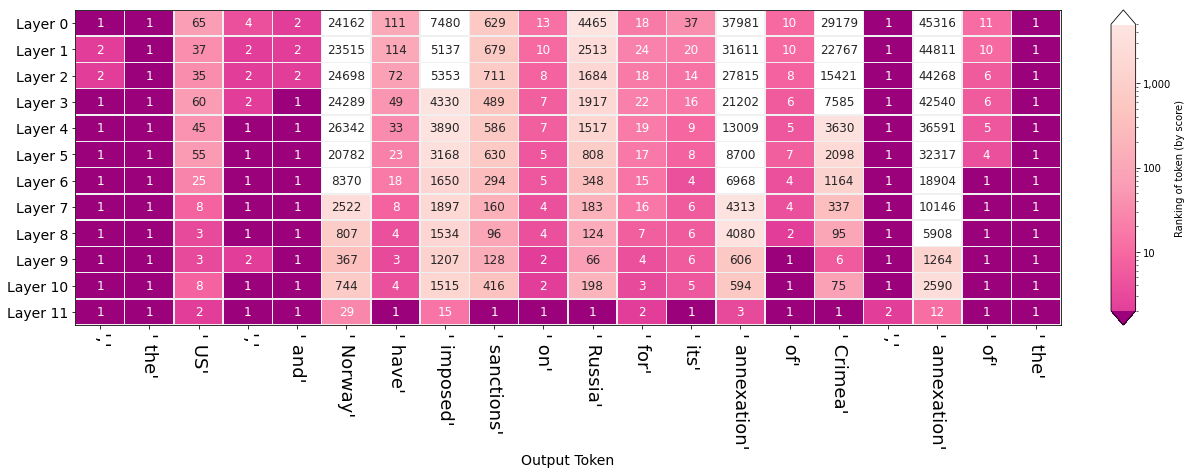

In [ ]:
output.rankings()

In [ ]:
output.saliency(style="detailed")

<IPython.core.display.Javascript object>

In [ ]:
output.activations.shape

(12, 3072, 25)

In [ ]:
nmf_1 = output.run_nmf(n_components=10)

In [ ]:
nmf_1.explore()

<IPython.core.display.Javascript object>

In [3]:
import tensorflow as tf
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# add the EOS token as PAD token to avoid warnings
model = TFGPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)

All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


## Greedy

In [4]:
greedy_output = lm.generate('Roses are red', max_length=50, do_sample=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
greedy_output.layer_predictions(position=5, topk=10, layer=11)

Predictions for position 5


<IPython.core.display.Javascript object>

## Beam search

In [12]:
import tensorflow as tf
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# add the EOS token as PAD token to avoid warnings
model = TFGPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)

text = 'Roses are red'
input_ids = tokenizer.encode(text, return_tensors='tf')
beam_outputs = model.generate(
    input_ids, 
    max_length=50, 
    num_beams=5, 
    no_repeat_ngram_size=2, 
    num_return_sequences=5, 
    early_stopping=True
)

print("Output:\n" + 100 * '-')
for i, beam_output in enumerate(beam_outputs):
  print("{}: {}".format(i, tokenizer.decode(beam_output, skip_special_tokens=True)))

Output:
----------------------------------------------------------------------------------------------------
0: Roses are red, but they're not white.

"I'm not sure if it's because of the color of my skin, or if I'm just trying to get a better look," he said. "I don't know.
1: Roses are red, but they're not white.

"I'm not sure if it's because of the color of my skin, or if I'm just trying to make it look better," he said. "I don't know.
2: Roses are red, but they're not white.

"I'm not sure if it's because of the color of my skin, or if I'm just trying to get a better look," he said. "I don't know."
3: Roses are red, but they're not white.

"I'm not sure if it's because of the color of my skin, or if I'm just trying to get a better look," he said. "I don't know if
4: Roses are red, but they're not white.

"I'm not sure if it's because of the color of my skin, or if I'm just trying to make it look better," he said. "I don't know."


In [11]:

beam_output

<tf.Tensor: shape=(1, 50), dtype=int32, numpy=
array([[  49, 4629,  389, 2266,   11,  475,  484,  821,  407, 2330,   13,
         198,  198,    1,   40, 1101,  407, 1654,  611,  340,  338,  780,
         286,  262, 3124,  286,  616, 4168,  393,  611,  340,  338,  780,
         286,  262, 3124,  286,  616, 4190,  393,  611,  340,  338,  780,
         286,  262, 3124,  286,  616, 4190]], dtype=int32)>

It's like talking to you in circles, you always say the same thing!!

In [ ]:
beam_output = model.generate(
    input_ids, 
    max_length=50, 
    num_beams=5, 
    no_repeat_ngram_size=2, 
    early_stopping=True
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
The orange is sweet, the red is sour, and the green is bitter.

I'm not sure if this is a good idea, or if it's just me, but I don't think I've ever heard of it before. I


# Sampling

In [10]:
sampling = lm.generate('Roses are red', max_length=30, do_sample=True, top_k=0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
sampling.layer_predictions(position=4, topk=30, layer=11)

<IPython.core.display.Javascript object>

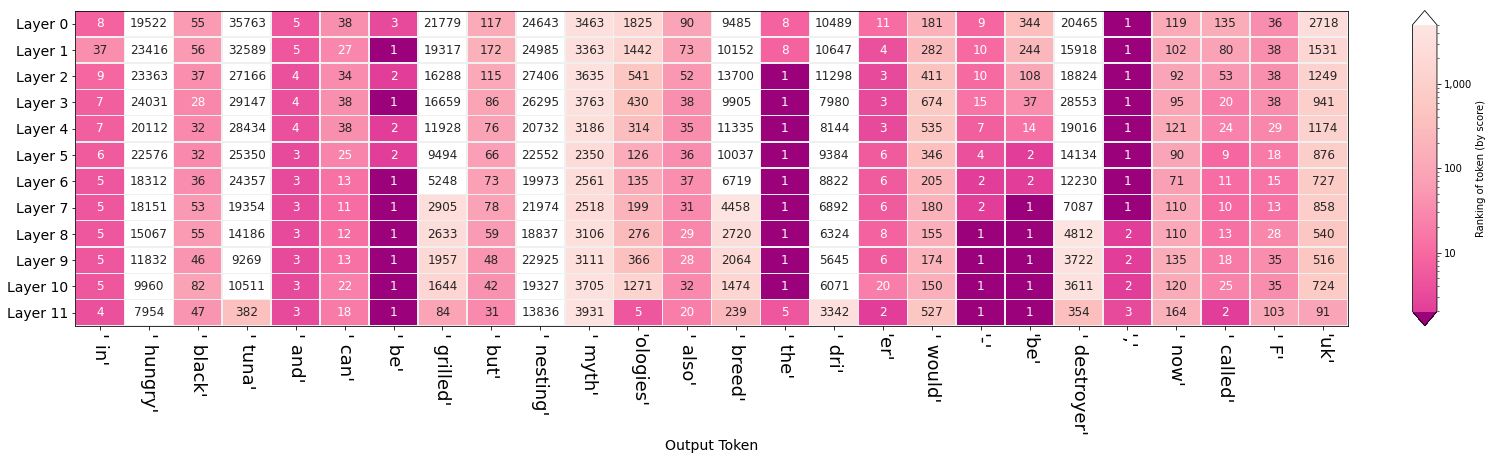

In [15]:
sampling.rankings()

Make the distribution sharper using temperature

In [12]:
sampling_temp = lm.generate('Roses are red', max_length=30, do_sample=True, top_k=0, temperature=0.5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

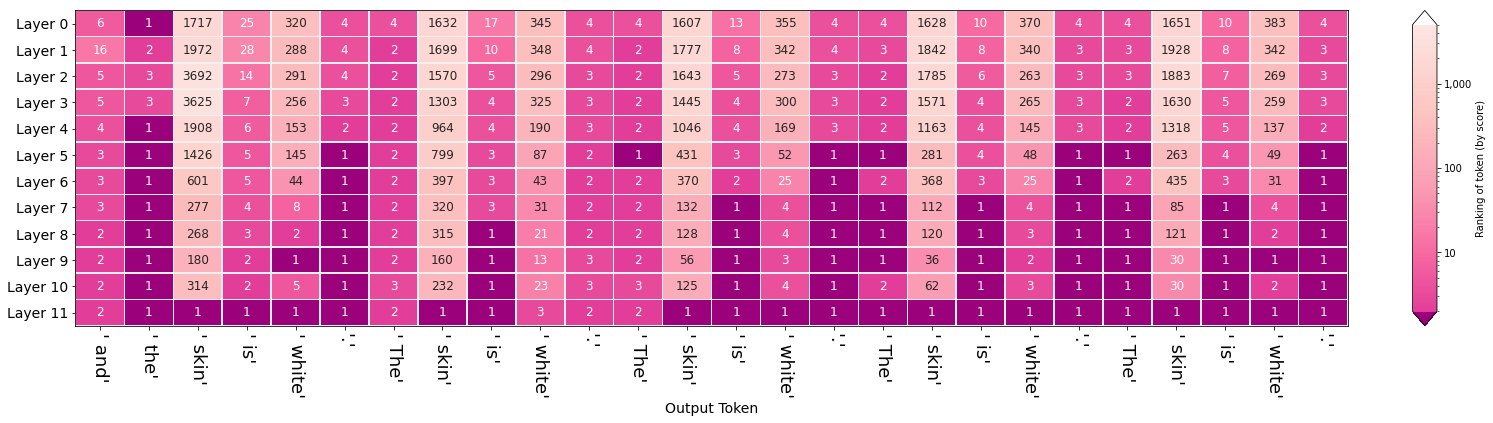

In [16]:
sampling_temp.rankings()

In [6]:
sampling_temp.layer_predictions(position=6, topk=30, layer=11)

<IPython.core.display.Javascript object>

## Top-K Sampling

In [20]:
topk = lm.generate('Roses are red, violets are blue', max_length=30, do_sample=True, top_k=20)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

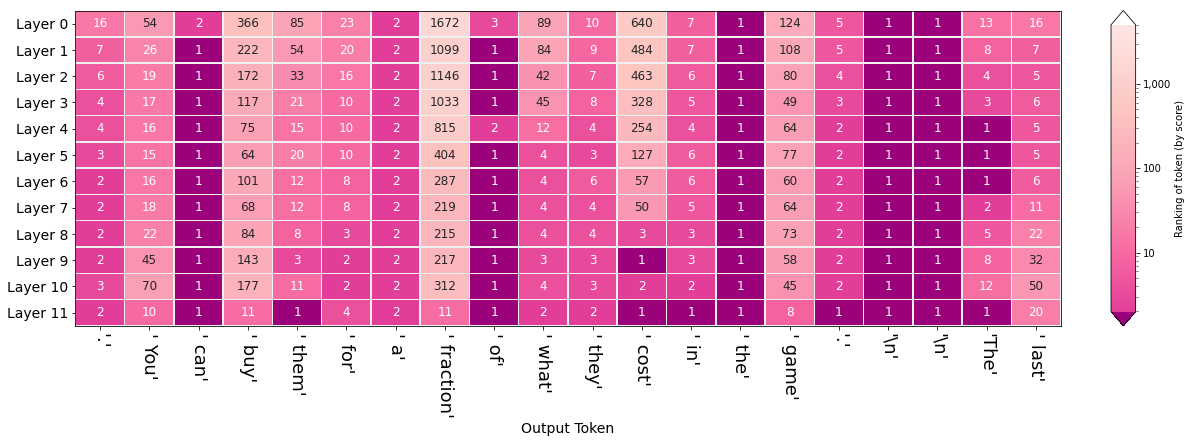

In [22]:
topk.rankings()

In [21]:
topk.layer_predictions(position=11, topk=30, layer=11)

<IPython.core.display.Javascript object>

## Top P sampling

In [41]:
topp = lm.generate('Roses are red, violets are blue', max_length=30, do_sample=True, top_p=0.4)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
topp.layer_predictions(position=13, topk=30, layer=11)

<IPython.core.display.Javascript object>

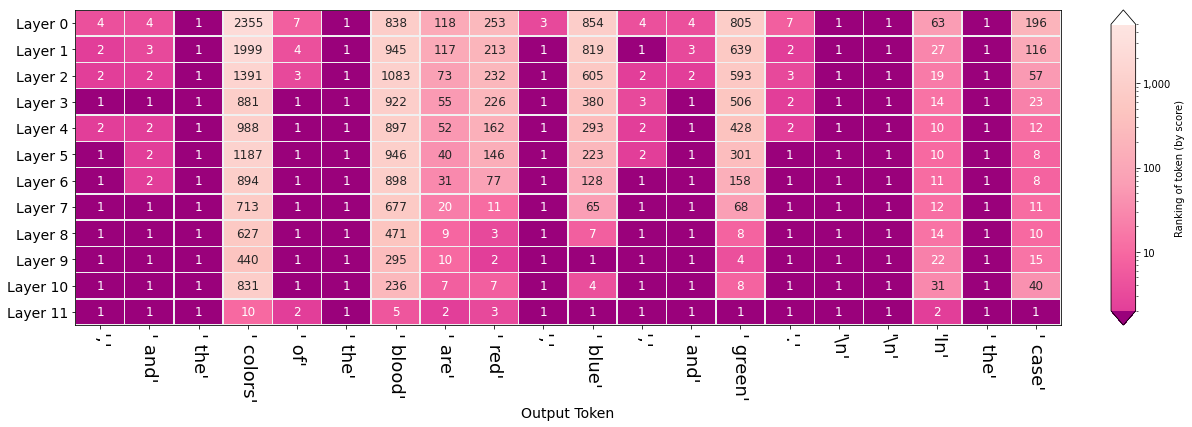

In [43]:
topp.rankings()